## Domain Analysis

## Importing the Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataset

In [4]:
data=pd.read_csv("Insaurance_prediction.csv")

In [5]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Basic checks

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
data.shape

(1338, 7)

## Data Visualisation

In [9]:
import sweetviz as sv
my_report=sv.analyze(data)
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<ipython-input-22-ad87a127b4e4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['bmi'])


Text(0, 0.5, 'Count')

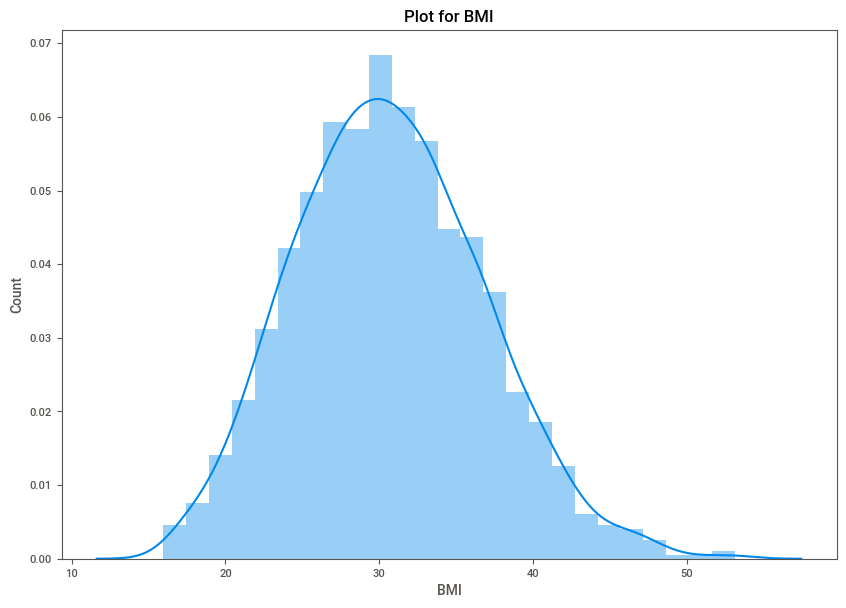

In [22]:
plt.figure(figsize=(10,7))
sns.distplot(data['bmi'])
plt.title('Plot for BMI')
plt.xlabel('BMI')
plt.ylabel('Count')

<ipython-input-23-6edd3fe5cb5e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'])


Text(0, 0.5, 'Count')

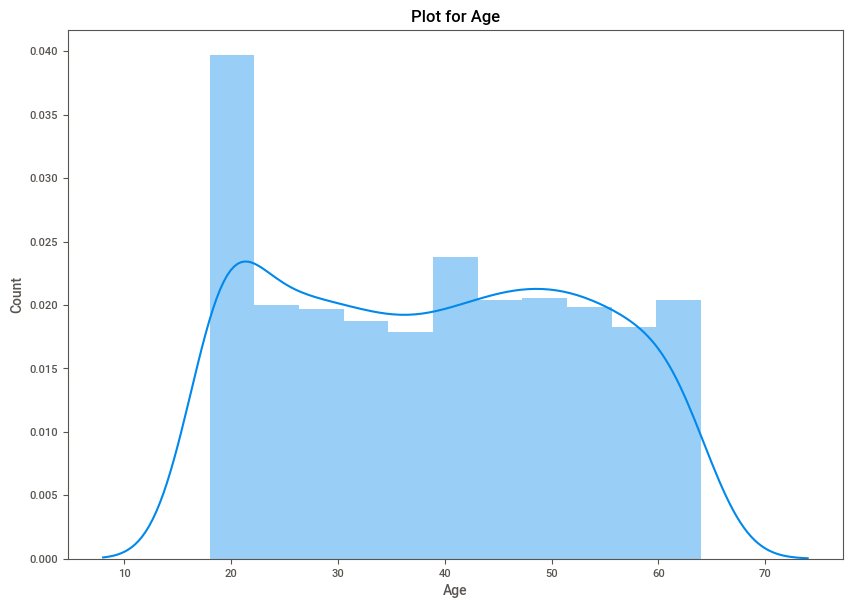

In [23]:
plt.figure(figsize=(10,7))
sns.distplot(data['age'])
plt.title('Plot for Age')
plt.xlabel('Age')
plt.ylabel('Count')

### bivariate analysis

<AxesSubplot: xlabel='bmi', ylabel='charges'>

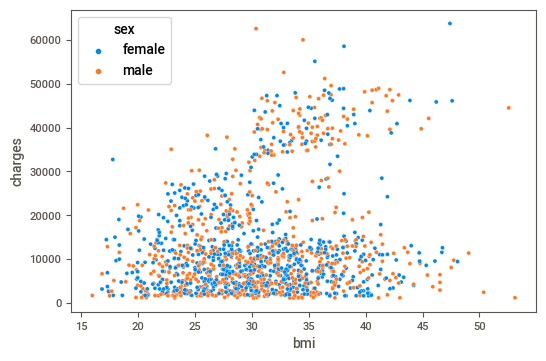

In [10]:
sns.scatterplot(data=data,x=data.bmi,y=data.charges,hue=data.sex)

<AxesSubplot: title={'center': 'Age vs Charge'}, xlabel='age', ylabel='charges'>

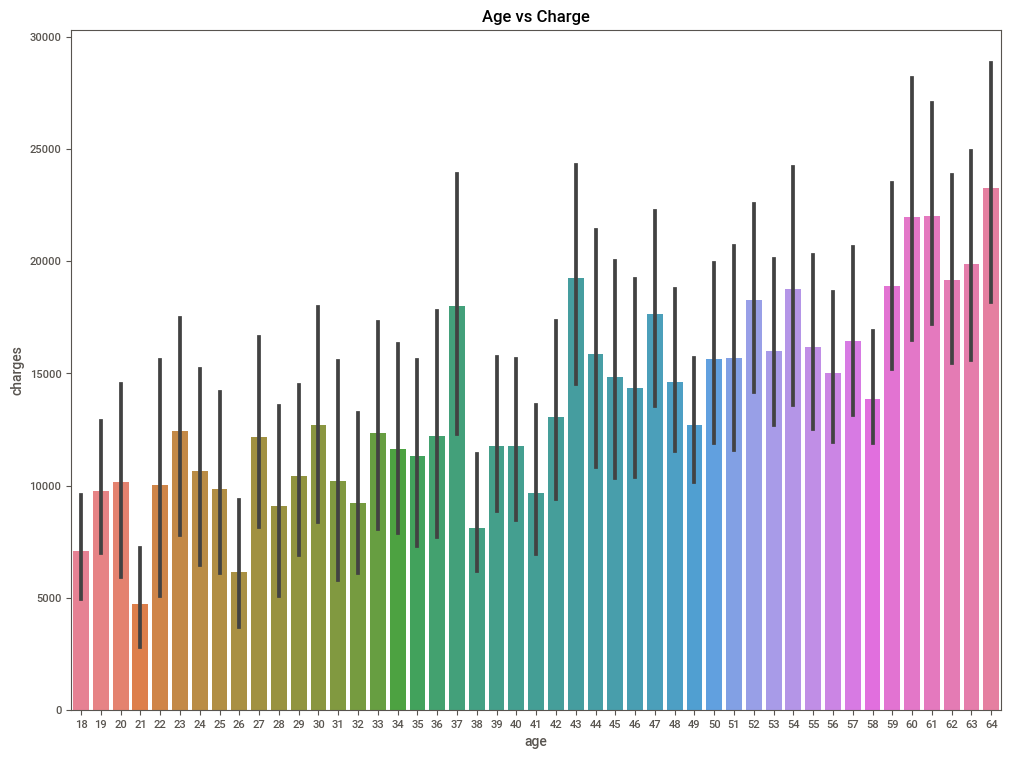

In [17]:
plt.figure(figsize=(12,9))
plt.title('Age vs Charge')
sns.barplot(x='age',y='charges',data=data,palette='husl')

<AxesSubplot: title={'center': 'Sex vs Charges'}, xlabel='sex', ylabel='charges'>

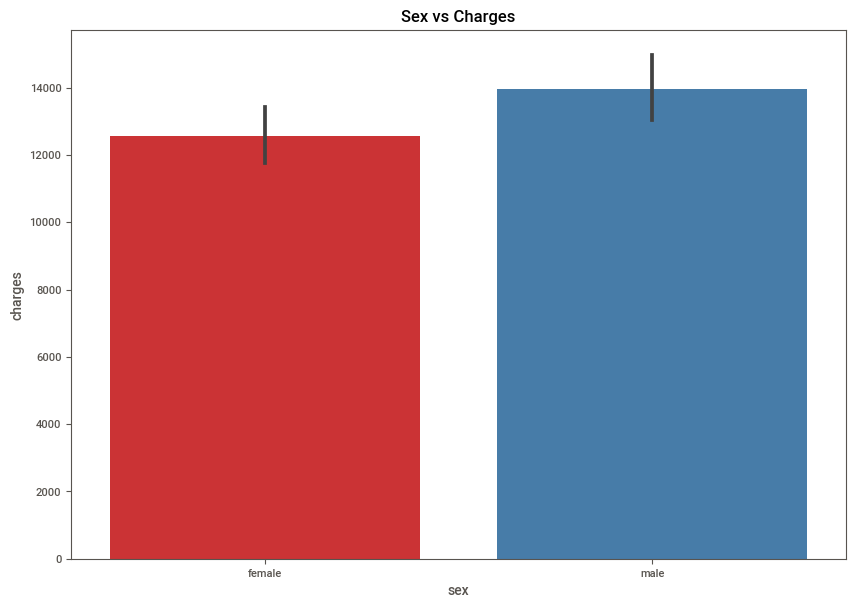

In [20]:

plt.figure(figsize=(10,7))
plt.title('Sex vs Charges')
sns.barplot(x='sex',y='charges',data=data,palette='Set1')

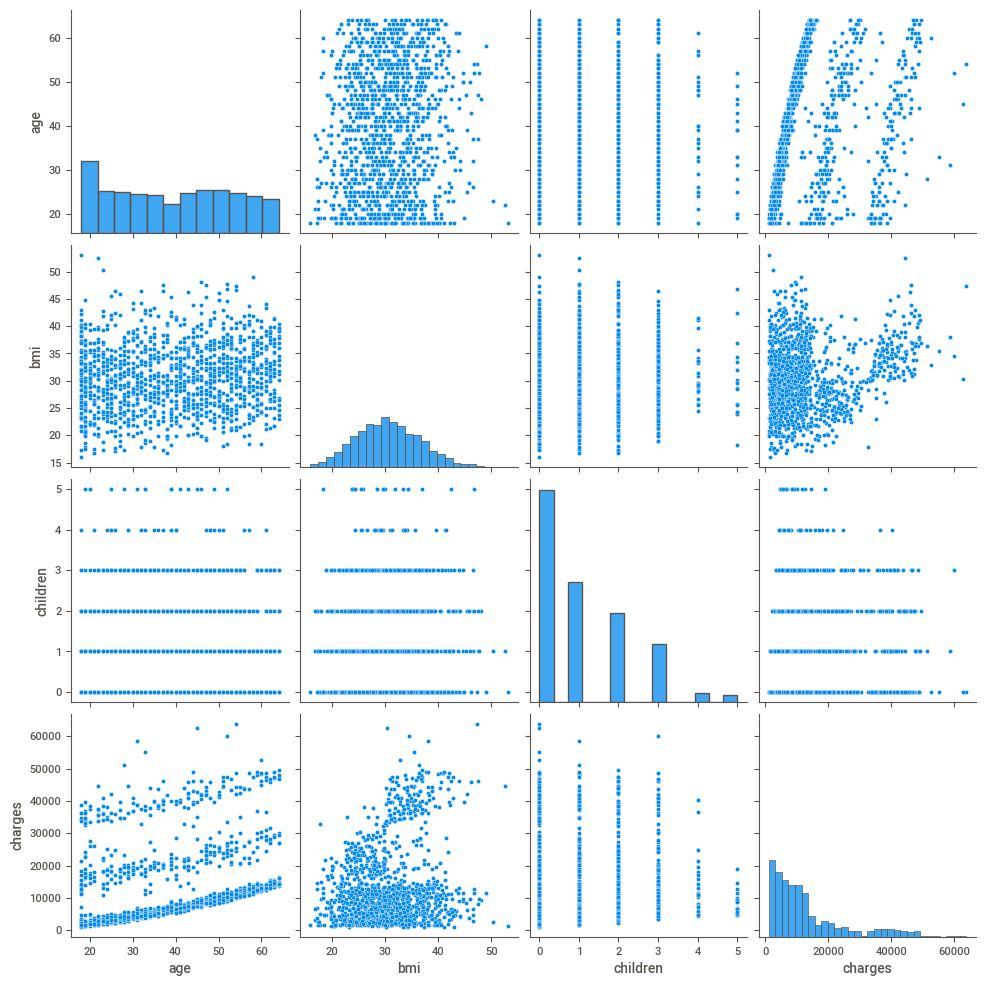

In [11]:
sns.pairplot(data=data)

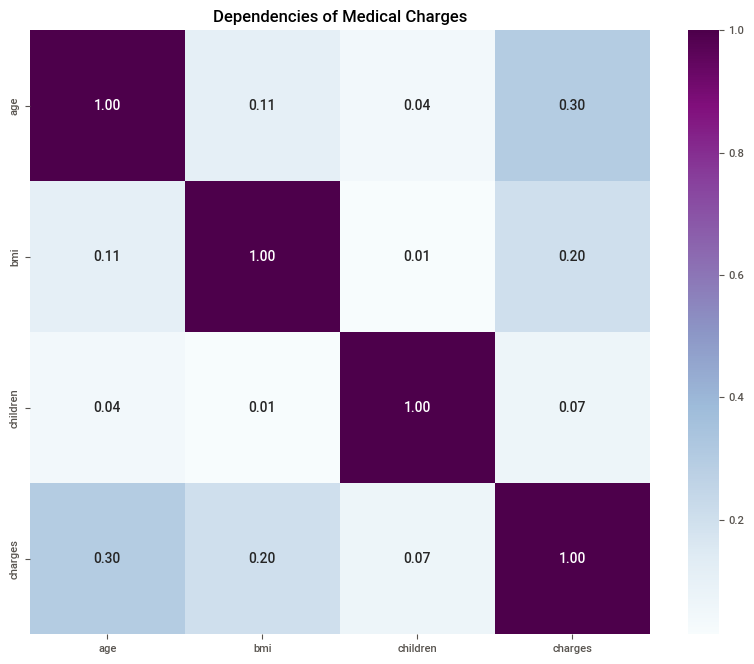

In [13]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr,cmap='BuPu',annot=True,fmt=".2f",ax=ax)
plt.title("Dependencies of Medical Charges")

plt.show()


## Data cleaning

In [10]:
## check for null values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
## search for duplicates
data.duplicated().sum()

1

In [12]:
data.drop_duplicates(keep='first',inplace=True)
data.duplicated().sum()

0

## Data preprocessing

In [13]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### convert categorical variables to numeric variable

In [14]:
data.replace({'female':1,'male':0},inplace=True)

In [15]:
data.replace({'yes':1,'no':0},inplace=True)

In [16]:
data.replace({'region':{'southwest':0,'southeast':1,'northwest':2,'northeast':3}},inplace=True)

In [17]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


In [18]:
X=data.drop(columns='charges',axis=1)
y=data['charges']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building and Testing

In [20]:
# model buliding using linear regression
from sklearn.linear_model import LinearRegression
selection = LinearRegression()
selection.fit(X, y)


LinearRegression()

In [21]:
# model building using random forest
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)


RandomForestRegressor()

In [22]:
print(X.shape, X_train.shape, X_test.shape)

(1337, 6) (1069, 6) (268, 6)


In [23]:
y_test

900      8688.85885
1064     5708.86700
1256    11436.73815
298     38746.35510
237      4463.20510
           ...     
534     13831.11520
542     13887.20400
760      3925.75820
1284    47403.88000
1285     8534.67180
Name: charges, Length: 268, dtype: float64

In [24]:
y_predict=selection.predict(X_test)

In [25]:
y_predict

array([ 8150.49520359,  5014.94750485, 14489.71030825, 32371.86716422,
        9050.31859882, 13387.29190427, 31077.19871324,   867.06409885,
       10872.74795509, 11286.57902174, 10538.37585919, 33998.67145996,
       31772.7639898 , 17450.12434339, 10818.43586211,  9074.30119582,
        3595.6112107 , 32615.73270076,  2524.46188962,  5259.69912997,
        3600.25010042, 30937.37779254, 15236.21261759, 30738.42218261,
       31958.51858732,  5378.54157175, 36486.64424277, 37157.59837357,
       11507.5713054 , 14168.70843312,  6493.93189904, 13019.38133556,
         215.68797004, 11797.25943651, 40957.0131321 , 12097.42602286,
        3919.47433669,  3622.23260795, 31753.29666368,  9119.95606714,
        7085.98968105, 30691.8588783 , 35629.79707686, 12398.12231836,
        7258.71209942,  2909.17684962,  6215.15986021,  8609.63887727,
        4140.86826873,  9095.74009386,  6615.41897232, 12276.94094057,
       31950.89983886,  3580.60581976, 10664.12118341,  9832.97314592,
      

In [26]:
y_predict_rf= rf_reg.predict(X_test)

In [27]:
y_predict_rf

array([10444.6052902,  6487.3584616, 12934.1501403, 43573.6964633,
        6468.9726334, 10524.6180284, 38671.4562516,  2104.91902  ,
        8464.3487198, 11462.2616883, 14867.6838283, 23605.0747989,
       43771.1287511, 14599.2780942,  7512.4783242,  9529.0736015,
        8134.785323 , 39689.3876718,  4085.825801 ,  4756.512079 ,
        4746.5468495, 21084.9677489, 10130.7734495, 20068.9808115,
       39204.9974201, 19691.5128739, 42869.1339955, 45520.436055 ,
       10458.2257787, 14883.2182104,  4275.3645622,  9729.1038424,
        2922.2406573, 14799.3892618, 47700.9458528,  9753.352802 ,
        6682.6810408,  5838.615426 , 23252.3465843,  8843.3526716,
        3887.670296 , 21586.9263392, 41635.572319 ,  9675.2381001,
        9178.1656088,  3588.3579138,  4197.436035 ,  7941.2542491,
        6755.5378852, 12170.7019071,  5106.7094077, 10852.6604472,
       23158.9537169,  5040.3802252,  7233.0176288,  8035.7773265,
       10922.5113103,  7089.6949223, 41496.4109751,  7445.3550

In [28]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [29]:
# Scores for Linear Regression
r2 = r2_score(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
print('r2_score: ',r2)
print('mean_squared_error: ',mse)
print('mean_absolute_error: ',mae)
print('root_mean_squared_error: ', np.sqrt(mean_squared_error(y_test, y_predict)))

r2_score:  0.8139469461252022
mean_squared_error:  34188376.882859446
mean_absolute_error:  4126.317487064449
root_mean_squared_error:  5847.08276688978


In [30]:
# Scores for Random Forest
r2 = r2_score(y_test, y_predict_rf)
mse = mean_squared_error(y_test, y_predict_rf)
mae = mean_absolute_error(y_test, y_predict_rf)
print('r2_score: ',r2)
print('mean_squared_error: ',mse)
print('mean_absolute_error: ',mae)
print('root_mean_squared_error: ', np.sqrt(mean_squared_error(y_test, y_predict_rf)))

r2_score:  0.8803607763579476
mean_squared_error:  21984432.841396388
mean_absolute_error:  2597.563395303732
root_mean_squared_error:  4688.756001478046


# Model Comparison Report

# Report on Challenges Faced